# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.shape

(50000, 14)

In [10]:
df.size

700000

In [11]:
### Checking null values:

In [12]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [13]:
### Visuals:
col = df.columns.to_list()
col

['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

In [14]:
num = ['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',]

In [15]:
cat = ['sales_channel','trip_type','flight_day','route','booking_origin']

In [16]:
df[num].describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000


In [17]:
df[cat].describe()

,flight_day
count,50000.000000
mean,3.814420
std,1.992792
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,7.000000


In [18]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [19]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

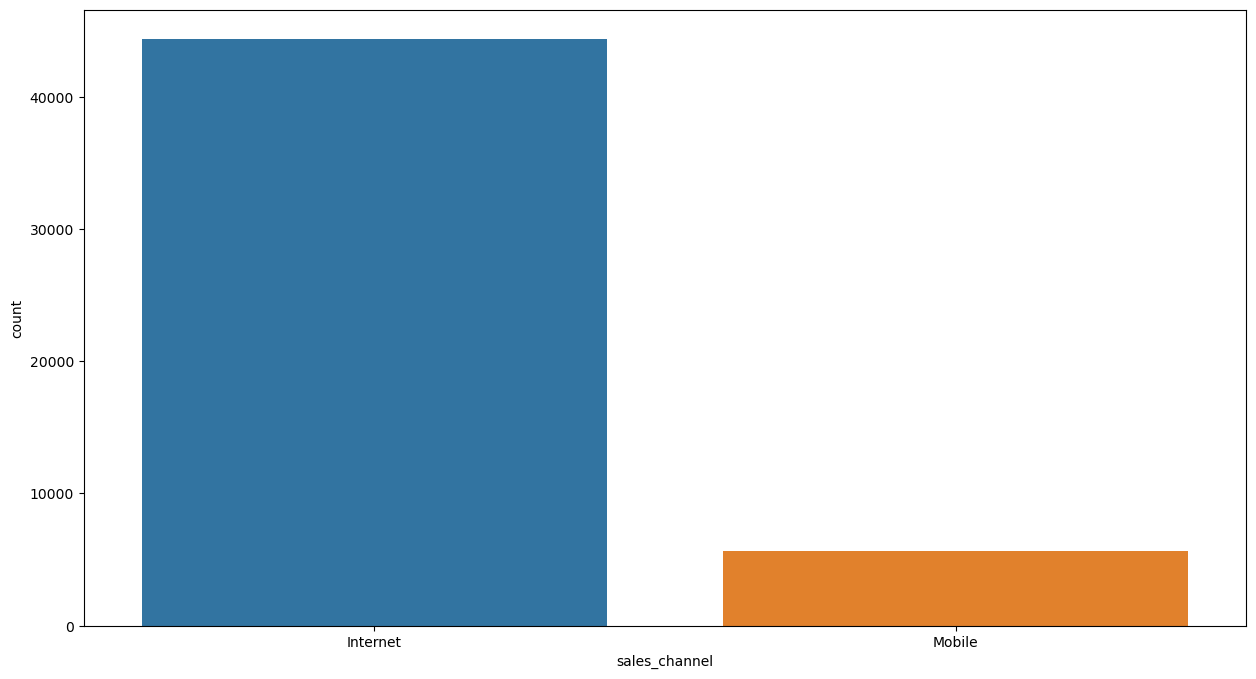

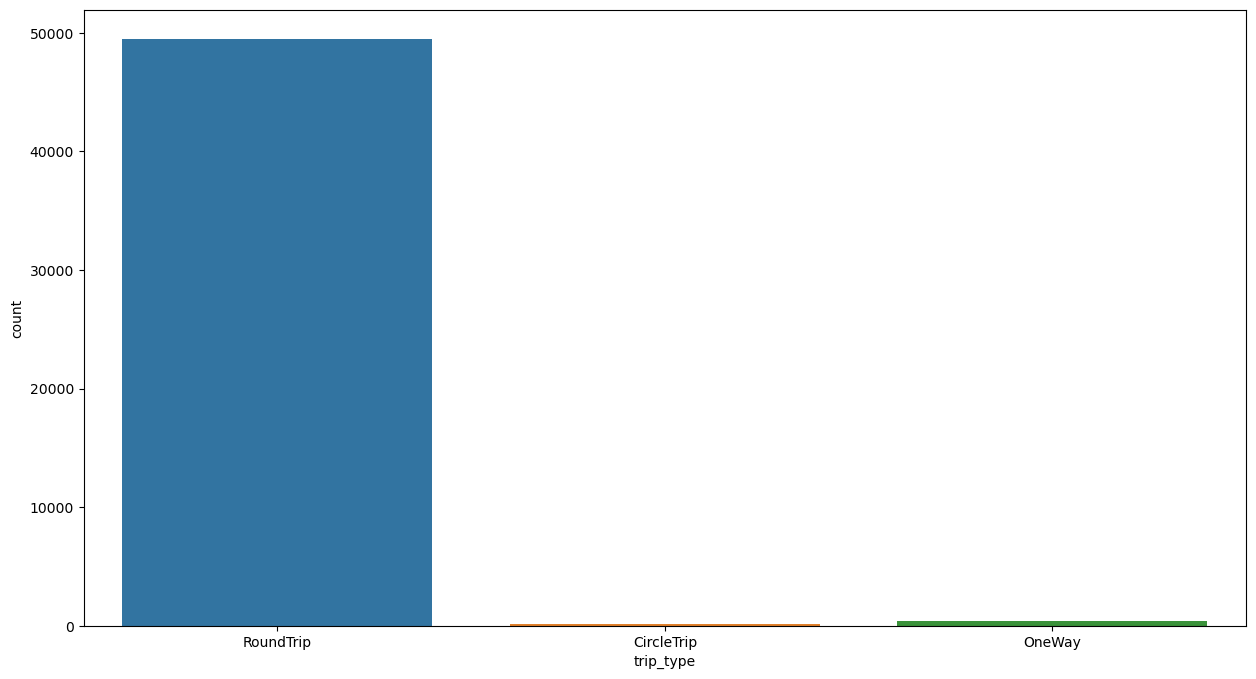

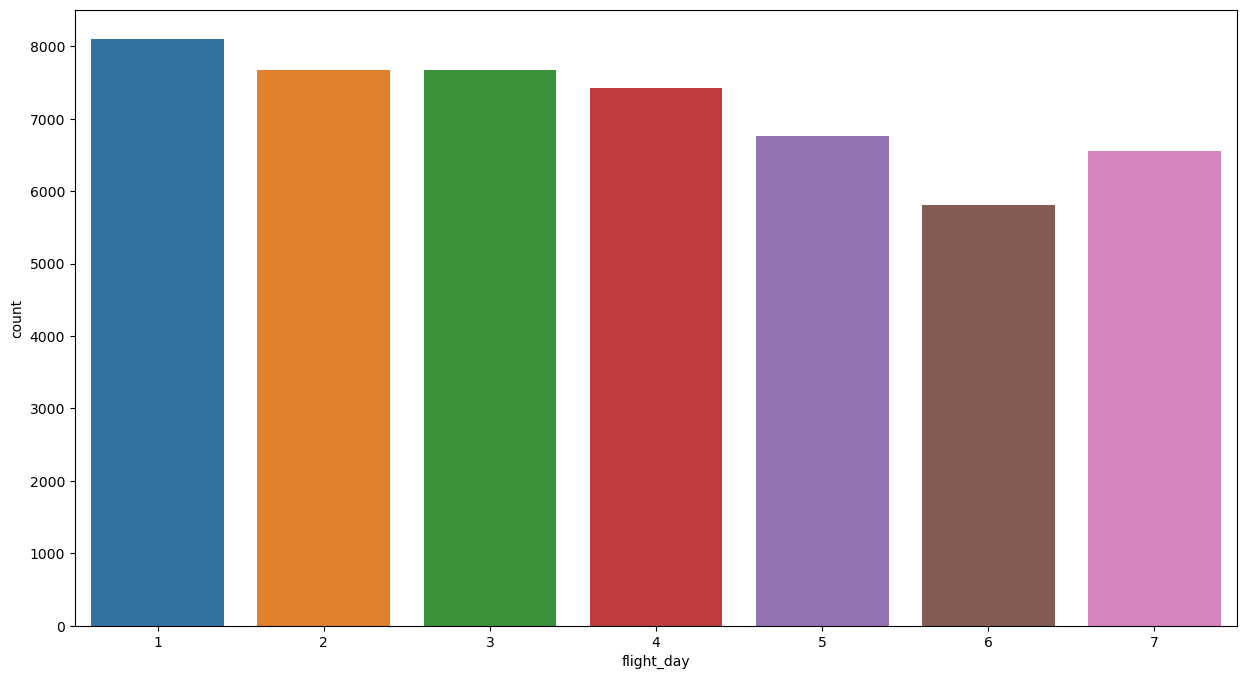

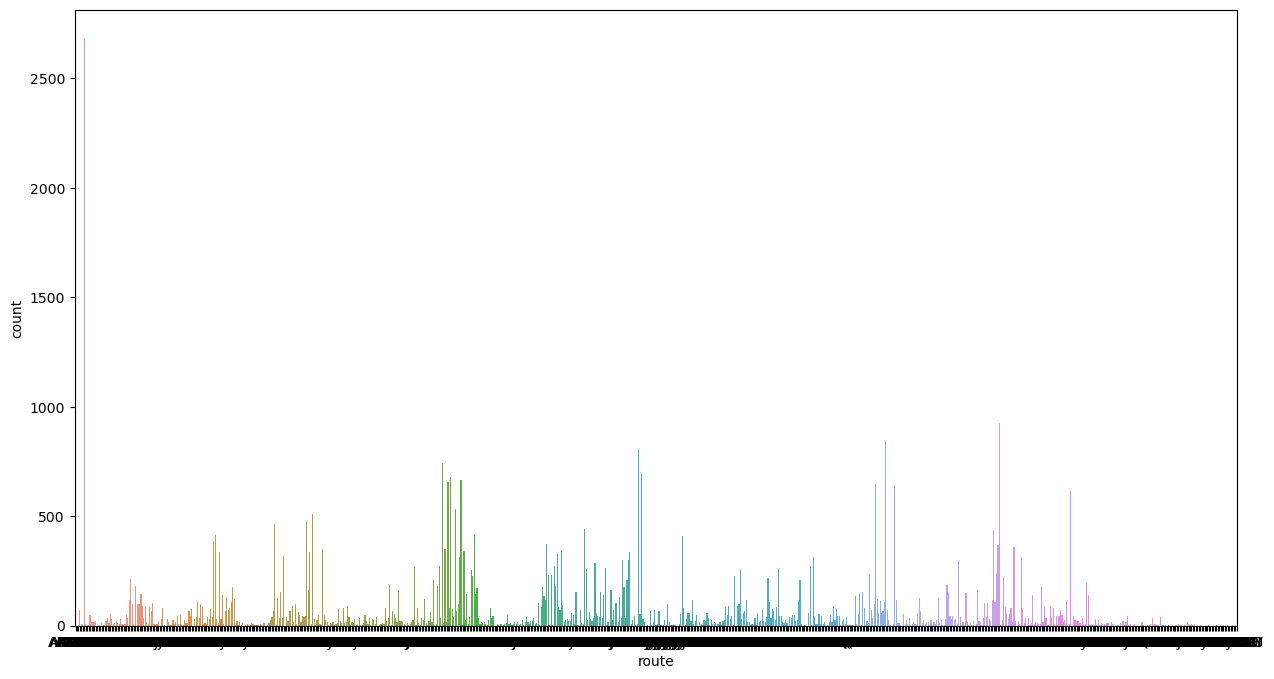

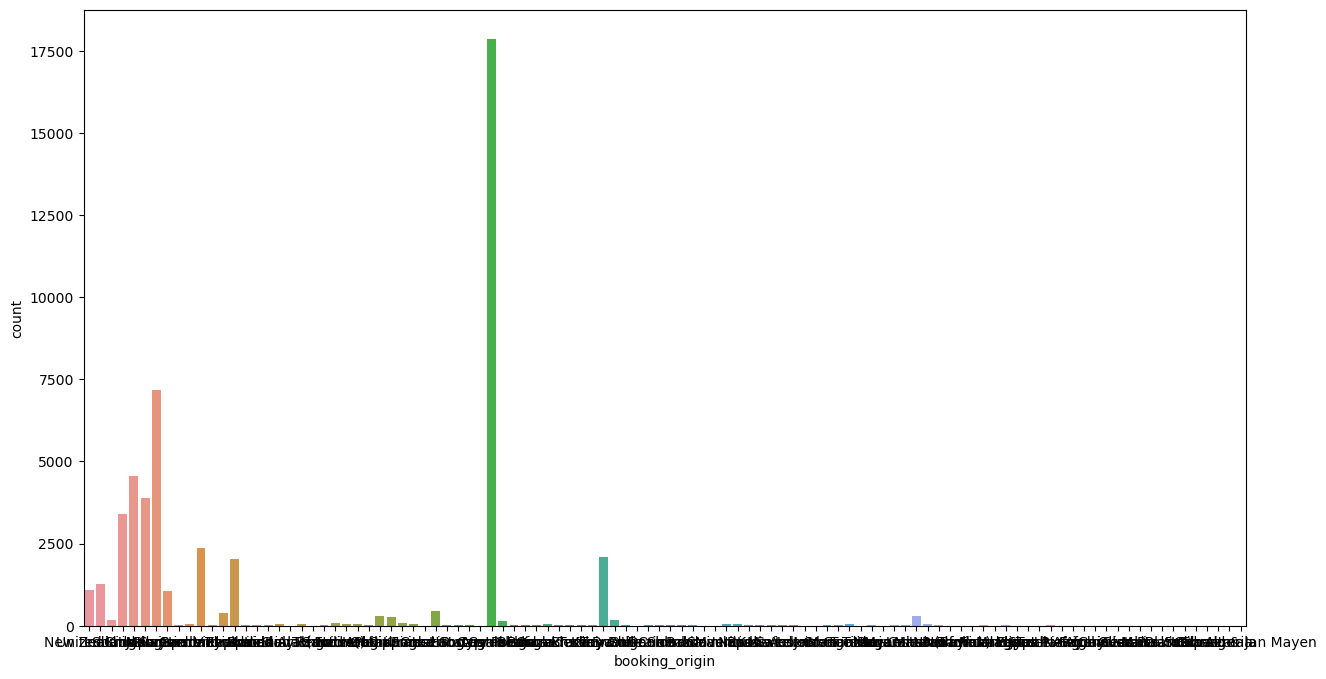

In [20]:
for i in cat:
    sns.countplot(df[i])
    plt.show()

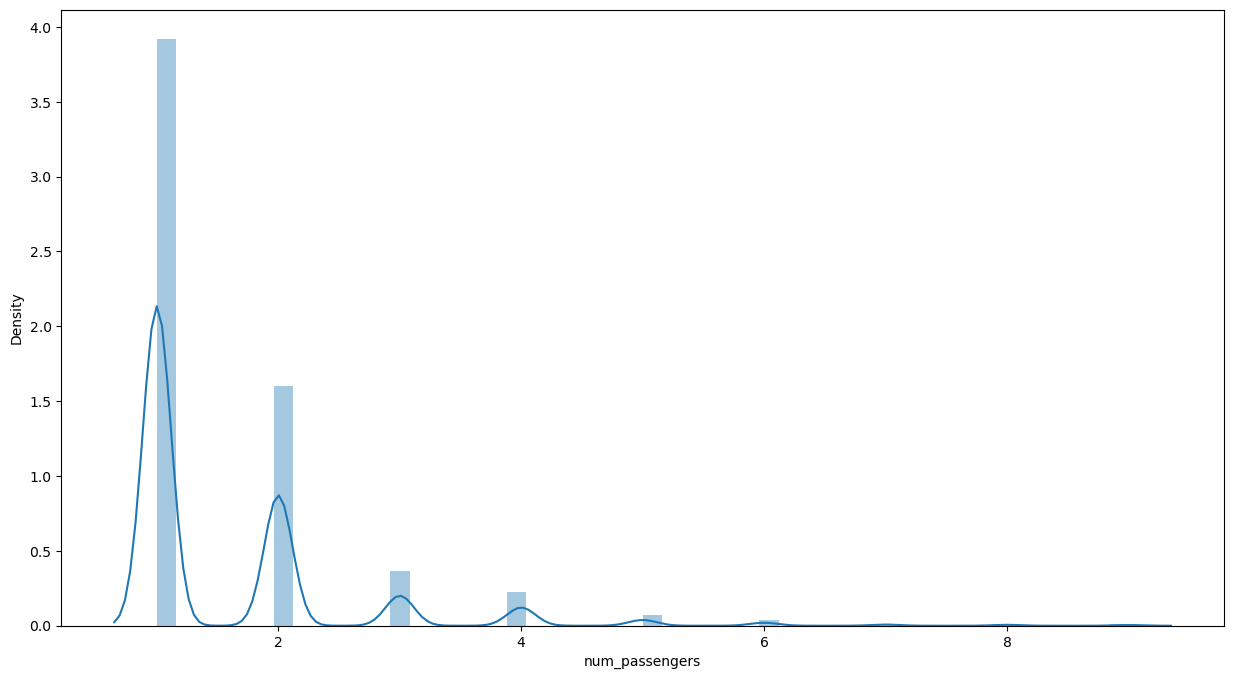

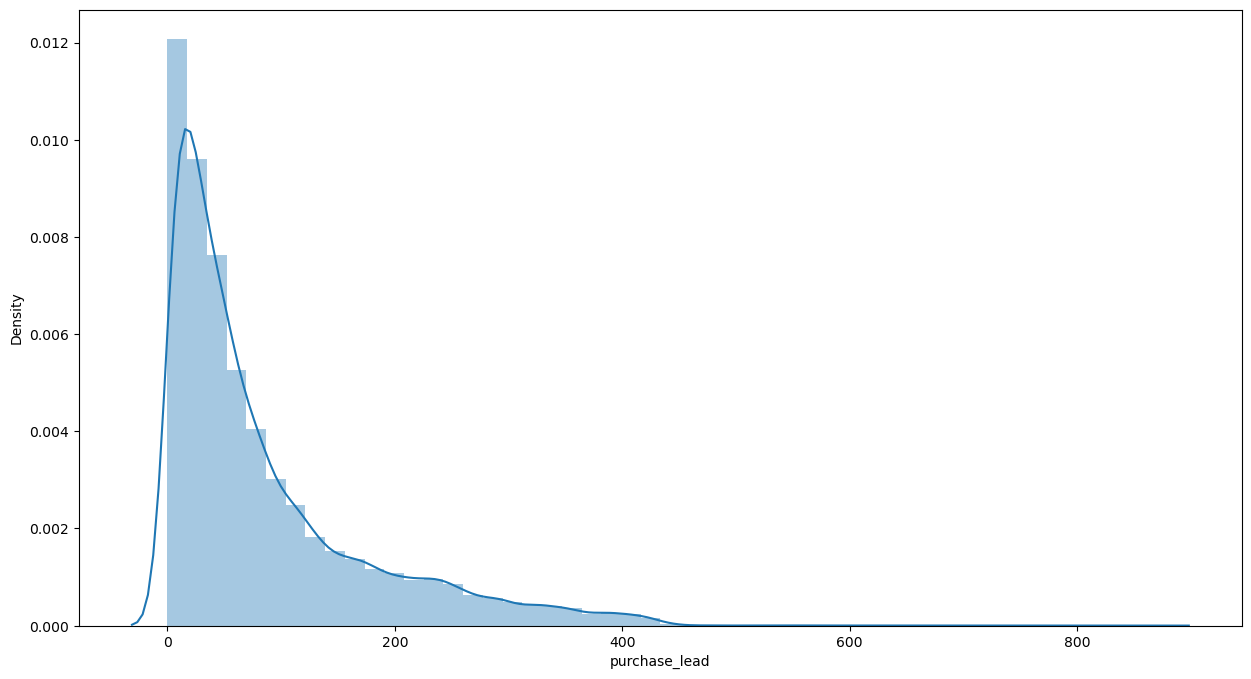

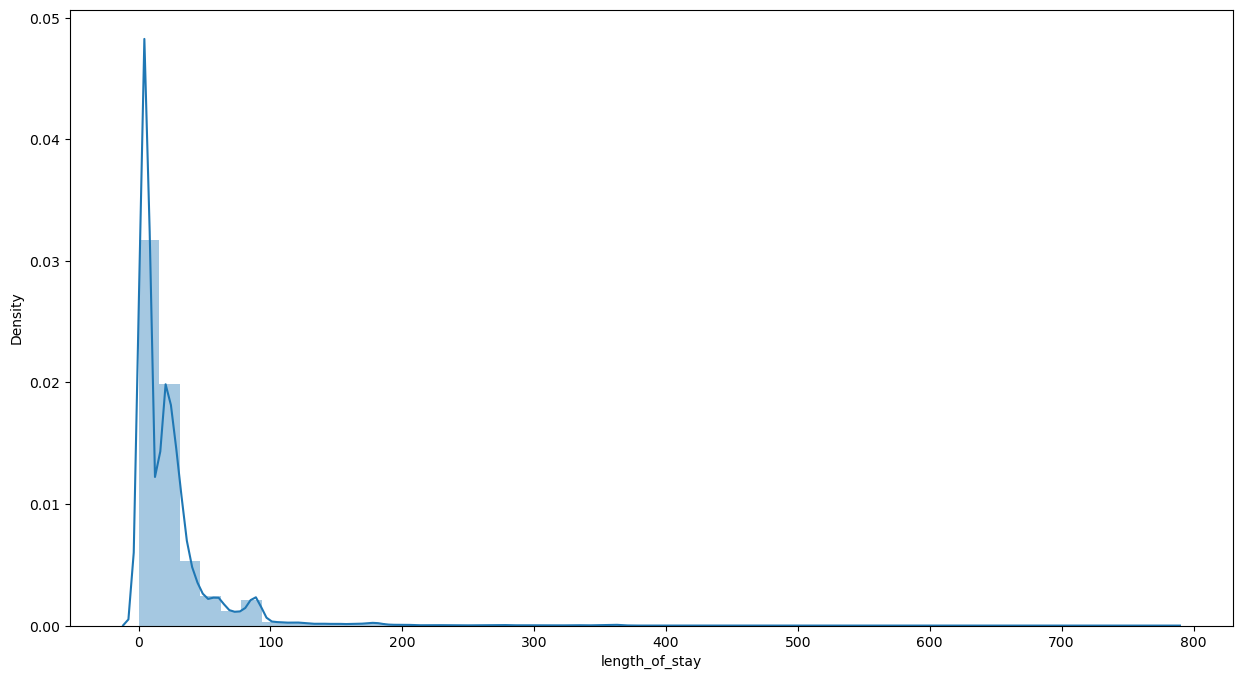

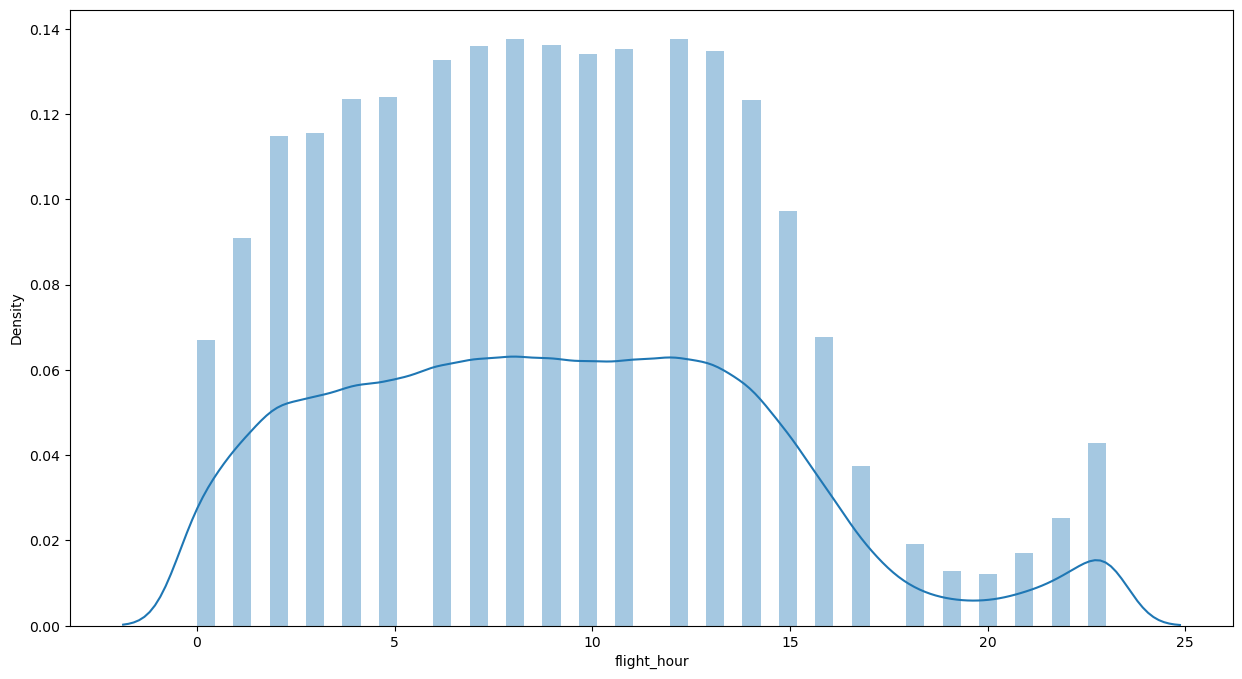

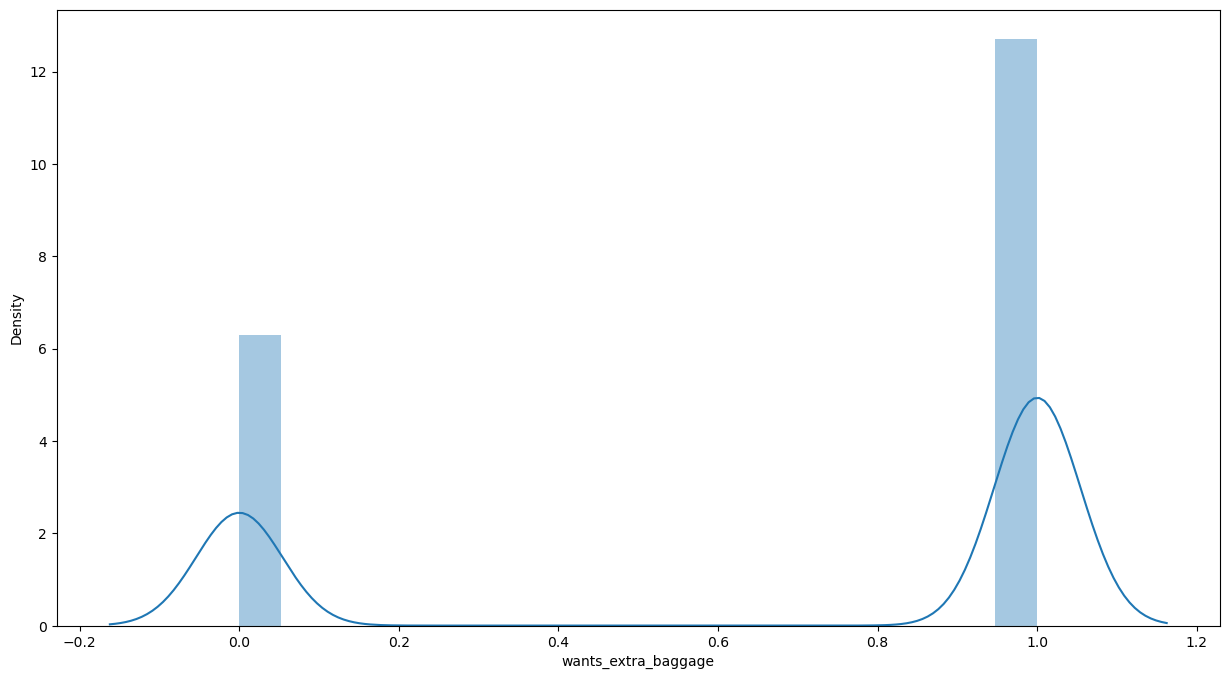

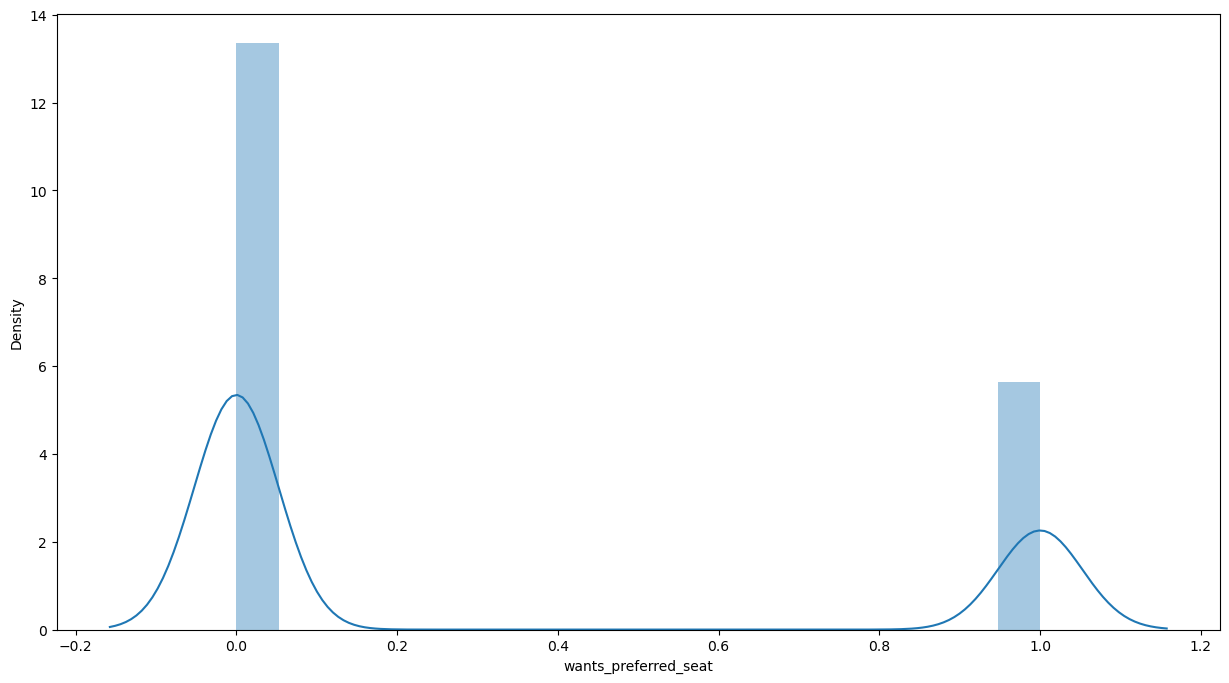

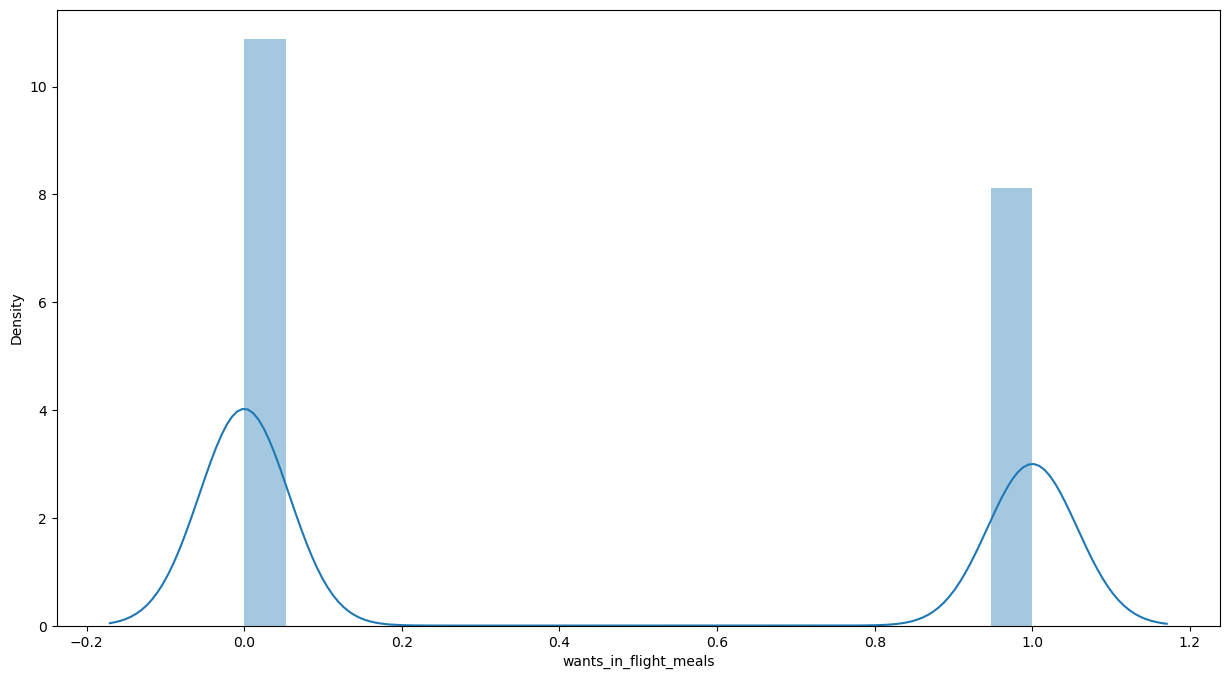

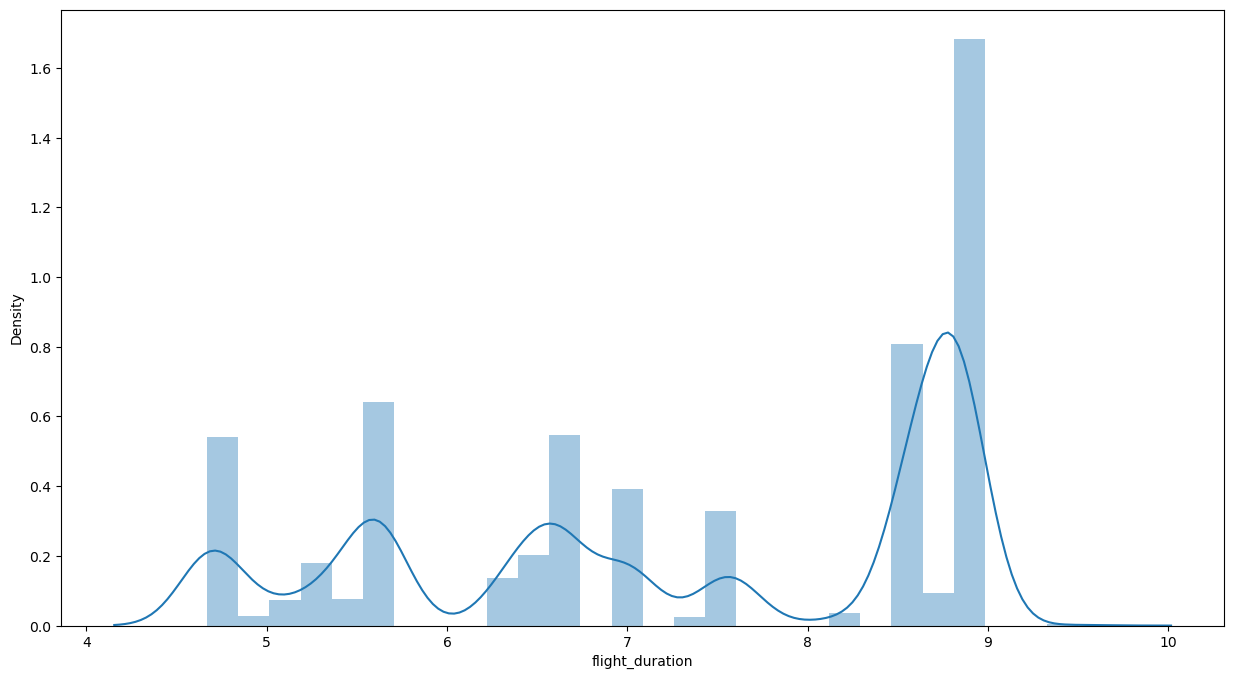

In [21]:
for i in num:
    sns.distplot(df[i])
    plt.show()

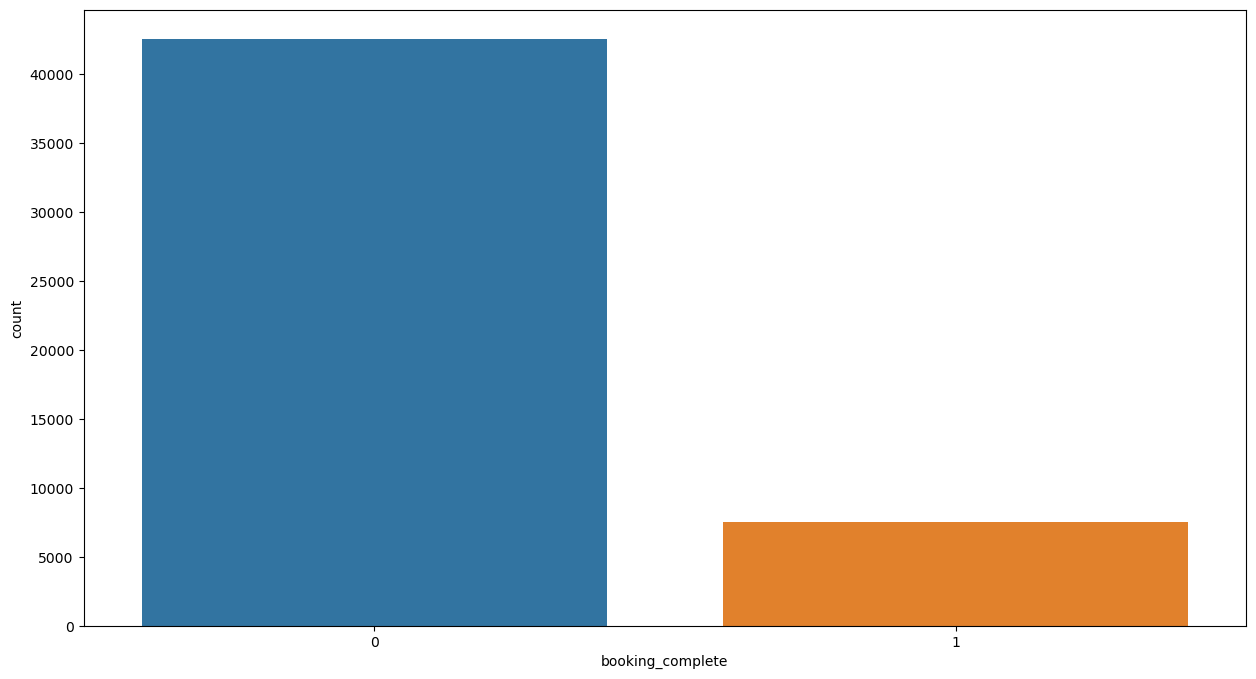

In [22]:
## Target column:

sns.countplot(df['booking_complete'])
plt.show()

##### As label column is imbalance i choose weighted f1-score as a evaluation metrices

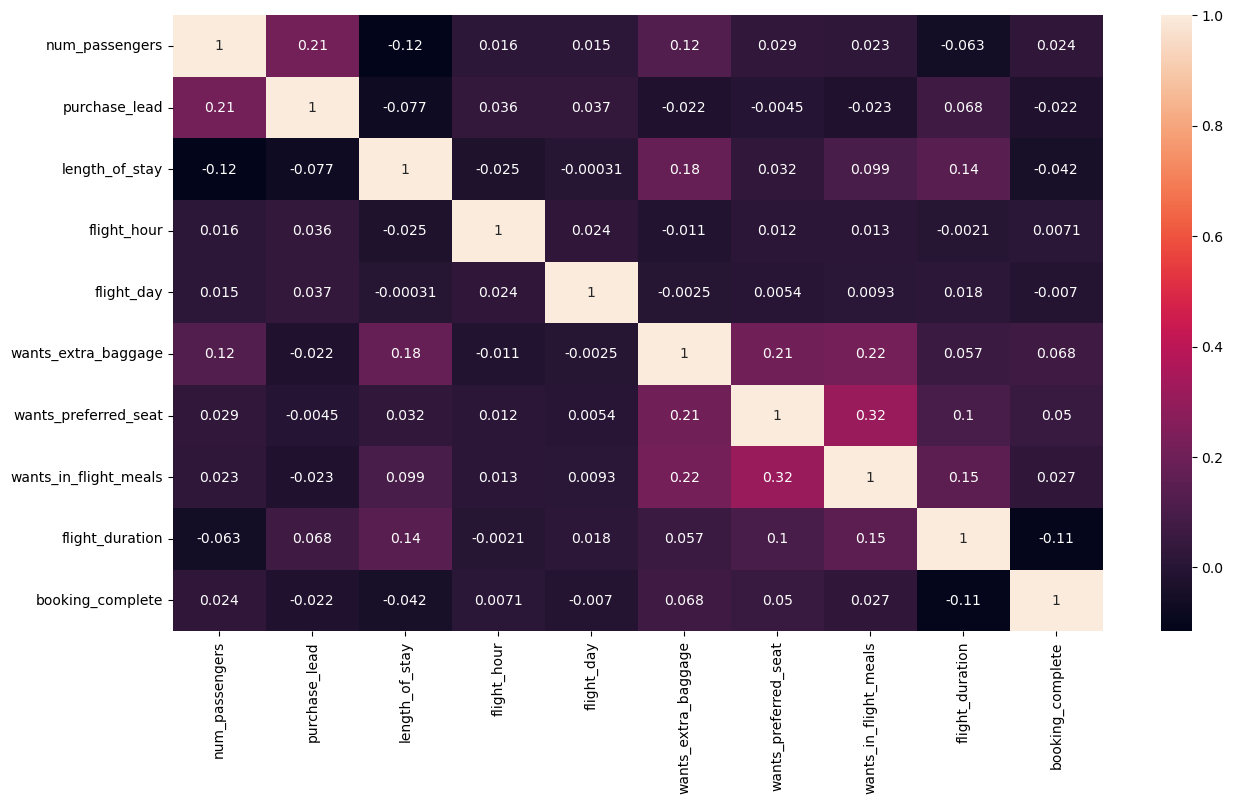

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Changing the dtypes:\

In [24]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [25]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [26]:
#Spliting independent and dependent variables:

x = df.drop('booking_complete',axis=1)
x

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62


In [27]:
y = df['booking_complete']
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [28]:
#changing object dtype to int dtype
for colname in x.select_dtypes("object"):
    x[colname], _ = x[colname].factorize()

In [29]:
x

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,6,0,0,1,0,0,5.52
1,1,0,0,112,20,3,6,0,0,0,0,0,5.52
2,2,0,0,243,22,17,3,0,1,1,1,0,5.52
3,1,0,0,96,31,4,6,0,0,0,0,1,5.52
4,2,0,0,68,22,15,3,0,1,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,6,638,36,1,0,1,5.62
49996,1,0,0,111,6,4,7,638,36,0,0,0,5.62
49997,1,0,0,24,6,22,6,638,36,0,0,1,5.62
49998,1,0,0,15,6,11,1,638,36,1,0,1,5.62


In [30]:
### Importing Libraries

In [31]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.feature_selection import RFE

from xgboost import XGBClassifier

### Train test split:

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)

In [33]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(35000, 13)
(15000, 13)
(35000,)
(15000,)


### Scaling:

In [34]:
xtrain_sc = xtrain.copy()
xtrain_sc

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
48824,2,0,2,40,6,5,1,549,3,1,0,1,8.83
2704,6,0,0,332,17,5,7,49,6,1,0,1,5.00
25631,1,0,0,5,2,9,1,6,3,0,0,0,8.83
7285,1,0,0,46,21,14,3,165,7,1,1,1,5.13
27346,1,1,0,29,3,12,2,264,5,0,0,0,7.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,2,1,0,56,22,14,5,457,36,1,1,1,5.62
79,1,0,1,282,18,19,2,5,0,1,0,0,4.75
12119,1,0,0,58,24,21,4,330,3,1,0,0,6.42
14147,2,0,0,31,21,1,5,381,36,0,0,1,6.62


In [35]:
xtest_sc = xtest.copy()
xtest_sc

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
4253,3,0,0,35,26,2,7,106,10,1,1,1,6.33
30076,2,0,0,18,4,5,7,109,46,0,0,0,4.67
48047,3,0,0,360,6,12,7,453,6,1,1,0,8.83
1666,1,0,0,47,39,9,5,6,0,1,0,1,8.83
30740,1,0,0,22,4,1,2,252,13,1,0,0,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24718,2,0,0,356,21,23,7,684,36,1,1,0,8.58
28544,1,1,0,40,3,0,7,483,7,1,0,0,7.00
37929,4,0,0,11,5,16,3,276,46,0,0,0,4.67
34814,1,0,0,51,4,11,1,677,46,1,0,0,4.67


In [36]:
s = StandardScaler()

xtrain_sc[num] = s.fit_transform(xtrain[num])
xtest_sc[num] = s.transform(xtest[num])


In [37]:
xtrain_sc

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
48824,0.397644,0,2,-0.496830,-0.502992,-0.749509,1,549,3,0.702082,-0.649981,1.158413,1.040151
2704,4.304869,0,0,2.715153,-0.178438,-0.749509,7,49,6,0.702082,-0.649981,1.158413,-1.519083
25631,-0.579162,0,0,-0.881828,-0.621011,-0.011798,1,6,3,-1.424335,-0.649981,-0.863250,1.040151
7285,-0.579162,0,0,-0.430831,-0.060418,0.910341,3,165,7,0.702082,1.538507,1.158413,-1.432216
27346,-0.579162,1,0,-0.617830,-0.591506,0.541485,2,264,5,-1.424335,-0.649981,-0.863250,0.198210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0.397644,1,0,-0.320831,-0.030914,0.910341,5,457,36,0.702082,1.538507,1.158413,-1.104795
79,-0.579162,0,1,2.165156,-0.148933,1.832480,2,5,0,0.702082,-0.649981,-0.863250,-1.686135
12119,-0.579162,0,0,-0.298831,0.028096,2.201335,4,330,3,0.702082,-0.649981,-0.863250,-0.570229
14147,0.397644,0,0,-0.595830,-0.060418,-1.487221,5,381,36,-1.424335,-0.649981,1.158413,-0.436587


In [38]:
xtest_sc

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
4253,1.374450,0,0,-0.551830,0.087106,-1.302793,7,106,10,0.702082,1.538507,1.158413,-0.630367
30076,0.397644,0,0,-0.738829,-0.562001,-0.749509,7,109,46,-1.424335,-0.649981,-0.863250,-1.739592
48047,1.374450,0,0,3.023152,-0.502992,0.541485,7,453,6,0.702082,1.538507,-0.863250,1.040151
1666,-0.579162,0,0,-0.419831,0.470669,-0.011798,5,6,0,0.702082,-0.649981,1.158413,1.040151
30740,-0.579162,0,0,-0.694829,-0.562001,-1.487221,2,252,13,0.702082,-0.649981,-0.863250,-0.182668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24718,0.397644,0,0,2.979152,-0.060418,2.570191,7,684,36,0.702082,1.538507,-0.863250,0.873099
28544,-0.579162,1,0,-0.496830,-0.591506,-1.671648,7,483,7,0.702082,-0.649981,-0.863250,-0.182668
37929,2.351256,0,0,-0.815829,-0.532496,1.279196,3,276,46,-1.424335,-0.649981,-0.863250,-1.739592
34814,-0.579162,0,0,-0.375831,-0.562001,0.357057,1,677,46,0.702082,-0.649981,-0.863250,-1.739592


### Selecting important features using Random Forest

In [40]:
## Using the feature_importance
rf = RandomForestClassifier()

rf.fit(xtrain_sc, ytrain)

# Calculate feature importances
importances = rf.feature_importances_
importances

fimp = pd.DataFrame(index=list(xtrain_sc.columns),data = list(importances),columns = ['Feature_importance'])
fimp.sort_values(by = 'Feature_importance',ascending = False)

,Feature_importance
purchase_lead,0.190569
route,0.149970
flight_hour,0.139167
length_of_stay,0.125723
booking_origin,0.112721
flight_day,0.090813
flight_duration,0.074287
num_passengers,0.048967
wants_in_flight_meals,0.020390
wants_preferred_seat,0.017928


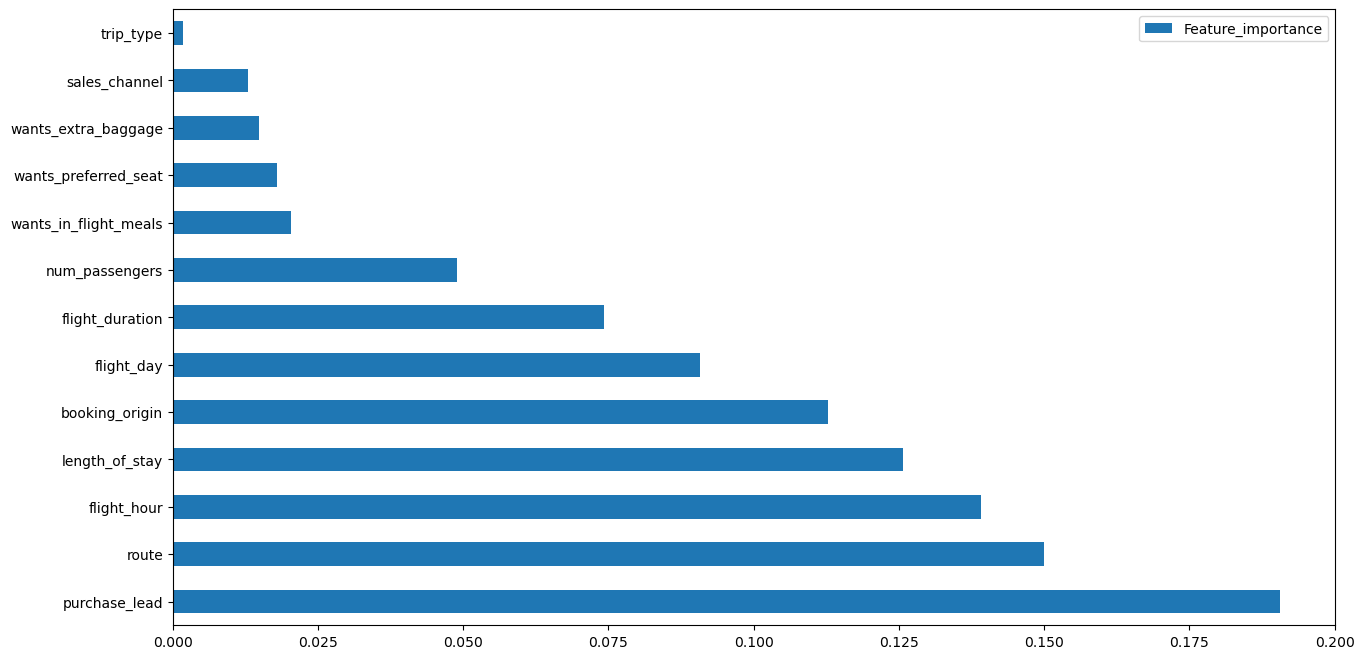

In [41]:
fimp.sort_values(by = 'Feature_importance',ascending = False).plot(kind='barh')
plt.show()

We can see

1. purchase_lead
2. route
3. flight_hour
4. booking_origin
5. length_of_stay


are the top 5 features which are dependant with booking_complete feature

## Model Building:

In [42]:
imp= ['route' , 'booking_origin', 'flight_hour','length_of_stay','purchase_lead']

In [43]:
xtrain_mi = xtrain_sc[imp]
xtrain_mi

,route,booking_origin,flight_hour,length_of_stay,purchase_lead
48824,549,3,-0.749509,-0.502992,-0.496830
2704,49,6,-0.749509,-0.178438,2.715153
25631,6,3,-0.011798,-0.621011,-0.881828
7285,165,7,0.910341,-0.060418,-0.430831
27346,264,5,0.541485,-0.591506,-0.617830
...,...,...,...,...,...
16304,457,36,0.910341,-0.030914,-0.320831
79,5,0,1.832480,-0.148933,2.165156
12119,330,3,2.201335,0.028096,-0.298831
14147,381,36,-1.487221,-0.060418,-0.595830


In [44]:
xtest_mi = xtest_sc[imp]
xtest_mi

,route,booking_origin,flight_hour,length_of_stay,purchase_lead
4253,106,10,-1.302793,0.087106,-0.551830
30076,109,46,-0.749509,-0.562001,-0.738829
48047,453,6,0.541485,-0.502992,3.023152
1666,6,0,-0.011798,0.470669,-0.419831
30740,252,13,-1.487221,-0.562001,-0.694829
...,...,...,...,...,...
24718,684,36,2.570191,-0.060418,2.979152
28544,483,7,-1.671648,-0.591506,-0.496830
37929,276,46,1.279196,-0.532496,-0.815829
34814,677,46,0.357057,-0.562001,-0.375831


### Metrices:

In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,classification_report,cohen_kappa_score,roc_auc_score,roc_curve

In [46]:
def metrices(name,key,arg):
    print('Name of the model :',name)
    print('Precision score :',precision_score(key,arg))    
    print('Recall score :',recall_score(key,arg)) 
    print('Accuracy :', accuracy_score(key,arg))
    print('F1-Score :', accuracy_score(key,arg))
    print('Weighted F1-Score', f1_score(key,arg,average='weighted'))
    print('Classification report','\n',classification_report(key,arg))
    print('Cohen Kappa Score :', cohen_kappa_score(key,arg))

### Decision Tree Classifier:

In [47]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(xtrain_mi,ytrain)
dt_pred = dt.predict(xtest_mi)
dt_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
metrices('Decision tree classifier',ytest,dt_pred)

Name of the model : Decision tree classifier
Precision score : 0.2756357670221493
Recall score : 0.3036601897876186
Accuracy : 0.7795333333333333
F1-Score : 0.7795333333333333
Weighted F1-Score 0.7838876165145379
Classification report 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     12787
           1       0.28      0.30      0.29      2213

    accuracy                           0.78     15000
   macro avg       0.58      0.58      0.58     15000
weighted avg       0.79      0.78      0.78     15000

Cohen Kappa Score : 0.15887249541377368


### Random Forest Classifier:

In [49]:
rf = RandomForestClassifier(random_state=100)
rf.fit(xtrain_mi,ytrain)
rf_pred = rf.predict(xtest_mi)
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
metrices('Random Forest classifier',ytest,rf_pred)

Name of the model : Random Forest classifier
Precision score : 0.4367509986684421
Recall score : 0.1482150926344329
Accuracy : 0.8461333333333333
F1-Score : 0.8461333333333333
Weighted F1-Score 0.812346035505416
Classification report 
               precision    recall  f1-score   support

           0       0.87      0.97      0.91     12787
           1       0.44      0.15      0.22      2213

    accuracy                           0.85     15000
   macro avg       0.65      0.56      0.57     15000
weighted avg       0.80      0.85      0.81     15000

Cohen Kappa Score : 0.15840291419156816


### Gradiant Boosting:

In [51]:
gb = GradientBoostingClassifier(random_state=100)
gb.fit(xtrain_mi,ytrain)
gb_pred = gb.predict(xtest_mi)
gb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
metrices('Gradiant Boosting',ytest,gb_pred)

Name of the model : Gradiant Boosting
Precision score : 0.5714285714285714
Recall score : 0.0018075011296882061
Accuracy : 0.8525333333333334
F1-Score : 0.8525333333333334
Weighted F1-Score 0.7851201229739458
Classification report 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     12787
           1       0.57      0.00      0.00      2213

    accuracy                           0.85     15000
   macro avg       0.71      0.50      0.46     15000
weighted avg       0.81      0.85      0.79     15000

Cohen Kappa Score : 0.002675702661256718


### XG boosting:

In [53]:
xg = XGBClassifier(random_state=100)
xg.fit(xtrain_mi,ytrain)
xg_pred = xg.predict(xtest_mi)
xg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
metrices('XG Boosting',ytest,xg_pred)

Name of the model : XG Boosting
Precision score : 0.39945652173913043
Recall score : 0.06642566651604158
Accuracy : 0.8475333333333334
F1-Score : 0.8475333333333334
Weighted F1-Score 0.7981684304420884
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     12787
           1       0.40      0.07      0.11      2213

    accuracy                           0.85     15000
   macro avg       0.63      0.52      0.52     15000
weighted avg       0.79      0.85      0.80     15000

Cohen Kappa Score : 0.07499365263098168


### Ada Boosting:

In [55]:
ada = AdaBoostClassifier(random_state=100)
ada.fit(xtrain_mi,ytrain)
ada_pred = ada.predict(xtest_mi)
ada_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
metrices('Ada Boosting',ytest,xg_pred)

Name of the model : Ada Boosting
Precision score : 0.39945652173913043
Recall score : 0.06642566651604158
Accuracy : 0.8475333333333334
F1-Score : 0.8475333333333334
Weighted F1-Score 0.7981684304420884
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     12787
           1       0.40      0.07      0.11      2213

    accuracy                           0.85     15000
   macro avg       0.63      0.52      0.52     15000
weighted avg       0.79      0.85      0.80     15000

Cohen Kappa Score : 0.07499365263098168


## Summary:

In [57]:
result = pd.DataFrame(index = ['Decision tree','Random Forest','Gradiant Boosting','XG Boosting','Ada Boosting'],
                      columns =[ 'Accuracy'],
                       data = [accuracy_score(ytest,dt_pred),accuracy_score(ytest,rf_pred),accuracy_score(ytest,gb_pred),
                              accuracy_score(ytest,xg_pred),accuracy_score(ytest,ada_pred)])

In [58]:
result

,Accuracy
Decision tree,0.779533
Random Forest,0.846133
Gradiant Boosting,0.852533
XG Boosting,0.847533
Ada Boosting,0.851467


In [59]:
result['Weighted F1-Score'] = [f1_score(ytest,dt_pred,average='weighted'),f1_score(ytest,rf_pred,average='weighted'),
                       f1_score(ytest,gb_pred,average='weighted'),f1_score(ytest,xg_pred,average='weighted'),
                       f1_score(ytest,ada_pred,average='weighted')]

In [60]:
result

,Accuracy,Weighted F1-Score
Decision tree,0.779533,0.783888
Random Forest,0.846133,0.812346
Gradiant Boosting,0.852533,0.785120
XG Boosting,0.847533,0.798168
Ada Boosting,0.851467,0.790977


#### Here Random Forest model with important feature has 84% accuracy and weighted f1 score of 0.81.It is considered to be a good model for given data